In [43]:
# this script plots either YZ sections at a specfic x or zonal-means

# set the file names
rootPath = '/Volumes/Evo/data/ziso/test_cases/5km/forward/'
meshFile = rootPath + 'mesh.nc'
initFile = rootPath + 'init.nc'
forcingFile = rootPath + 'forcing.nc'
outputFile = rootPath + 'analysis_members/timeSeriesStats.0009-06-15.nc'

# pick a time level (note, first time record is zero)
iTime = 0

# set logical for zonal mean (if false (0), must then set iSection)
zonalMean = 1
iSection = 5

# this script assumes a perfect hexagonal grid
# so nCells = nX * nY, set nX and nY
#nX = 50
#nY = 112

nX = 200
nY = 460

#set some reference potential density
potentialDensityOffset = 1029.0

In [44]:
from netCDF4 import Dataset                     # For reading data
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt                 # For plotting
import numpy.ma as ma
# Place figures within document
%pylab inline
pylab.rcParams['figure.figsize'] = (18.0, 10.0) # Large figures

Populating the interactive namespace from numpy and matplotlib


In [45]:
#plotting rules
axis_font = {'fontname':'Arial', 'size':'18'}    
title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'normal'}
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

if zonalMean==1:
    titlePrefix = 'zonal-mean: '
else:
    titlePrefix = 'section at i = ' + str(iSection) + ': '
    
print titlePrefix

zonal-mean: 


In [46]:
meshData = Dataset(meshFile);
initData = Dataset(initFile);
forcingData = Dataset(forcingFile);
outputData = Dataset(outputFile);

nCells = len(meshData.dimensions['nCells']);
nVertices = len(meshData.dimensions['nVertices']);
nEdges = len(meshData.dimensions['nEdges']);
nVertLevels = len(initData.dimensions['nVertLevels']);
nTime = len(outputData.dimensions['Time']);

print 'mesh file: ', meshFile
print 'init file: ', initFile
print 'forcing file: ', forcingFile
print 'output file: ', outputFile
print ' '
print 'nCells: ', nCells
print 'nVertices: ', nVertices
print 'nEdges: ', nEdges
print 'nVertLevels: ', nVertLevels
print 'nTime: ', nTime

mesh file:  /Volumes/Evo/data/ziso/test_cases/5km/forward/mesh.nc
init file:  /Volumes/Evo/data/ziso/test_cases/5km/forward/init.nc
forcing file:  /Volumes/Evo/data/ziso/test_cases/5km/forward/forcing.nc
output file:  /Volumes/Evo/data/ziso/test_cases/5km/forward/analysis_members/timeSeriesStats.0009-06-15.nc
 
nCells:  92000
nVertices:  184400
nEdges:  276400
nVertLevels:  100
nTime:  1


In [47]:
print ' assuming perfect hexagonal grid'
print '    number of grid cells in x-direction: ', nX
print '    number of grid cells in y-direction: ', nY

 assuming perfect hexagonal grid
    number of grid cells in x-direction:  200
    number of grid cells in y-direction:  460


In [48]:
#get grid information
xCell = meshData.variables['xCell'][:];
yCell = meshData.variables['yCell'][:];

xIndex = range(0,nX)
yIndex = range(0,nY)

xCell = xCell.reshape(nY,nX)
yCell = yCell.reshape(nY,nX)
xCell = np.array(xCell)
yCell = np.array(yCell)

xPosition=[]
for i in range(0,nX):
    xData = xCell[1,i] / 1000.0
    xPosition.append(xData)
    
yPosition=[]
for j in range(0,nY):
    yData = yCell[j,1] / 1000.0
    yPosition.append(yData)
       
refZMid = initData.variables['refZMid'][:]

xPosition = np.array(xPosition)
yPosition = np.array(yPosition)
zPosition = np.array(refZMid)

(92000, 100)


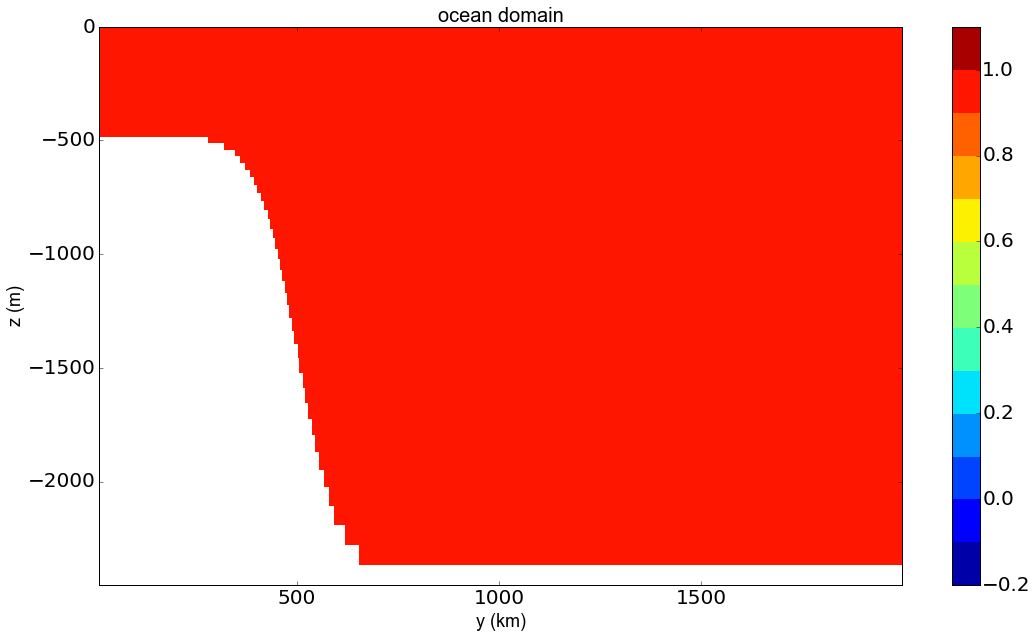

In [49]:
#get 3D ocean mask based on maxLevelCell

maxLevelCell = initData.variables['maxLevelCell'][:]

oceanMask=[]
for iCell in range(0,nCells):
    for k in range(0,maxLevelCell[iCell]):
        oceanMask.append(1)
    for k in range(maxLevelCell[iCell],nVertLevels):
        oceanMask.append(NaN)
    
oceanMask = np.array(oceanMask)
oceanMask = oceanMask.reshape(nCells,nVertLevels)
print oceanMask.shape
oceanMask = oceanMask.reshape(nY,nX,nVertLevels)

minVal = -0.2
maxVal = 1.2
incVal = 0.1
plotData = oceanMask[:,iSection,:]
plt.contourf(yPosition, zPosition, plotData.T, levels=numpy.arange(minVal,maxVal,incVal));
plt.colorbar();
plt.title('ocean domain', **title_font)
plt.xlabel("y (km)", **axis_font)
plt.ylabel('z (m)', **axis_font)

(460,)
(460,)


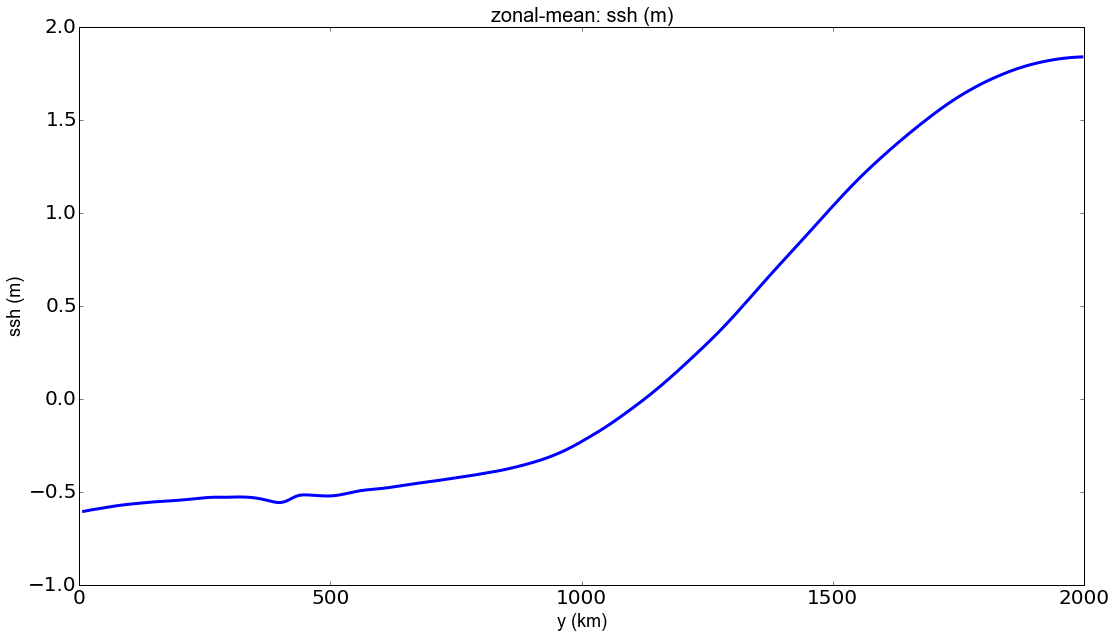

In [50]:
#ssh
ssh = outputData.variables['timeSeriesStats_avg_ssh_1'][iTime,:];
ssh = ssh.reshape(nY,nX)

if zonalMean==1:
    sumData = np.sum(ssh, axis=1);
    sumData = np.divide(sumData,nX)
    plotData = sumData
    figTitle = titlePrefix + 'ssh (m)'
else:
    plotData = ssh[:,iSection];
    figTitle = titlePrefix + 'ssh (m)'

print yPosition.shape
print plotData.shape

plt.plot(yPosition, plotData, linewidth=3);
plt.title(figTitle, **title_font)
plt.xlabel("y (km)", **axis_font)
plt.ylabel('ssh (m)', **axis_font)

(460,)
(460,)


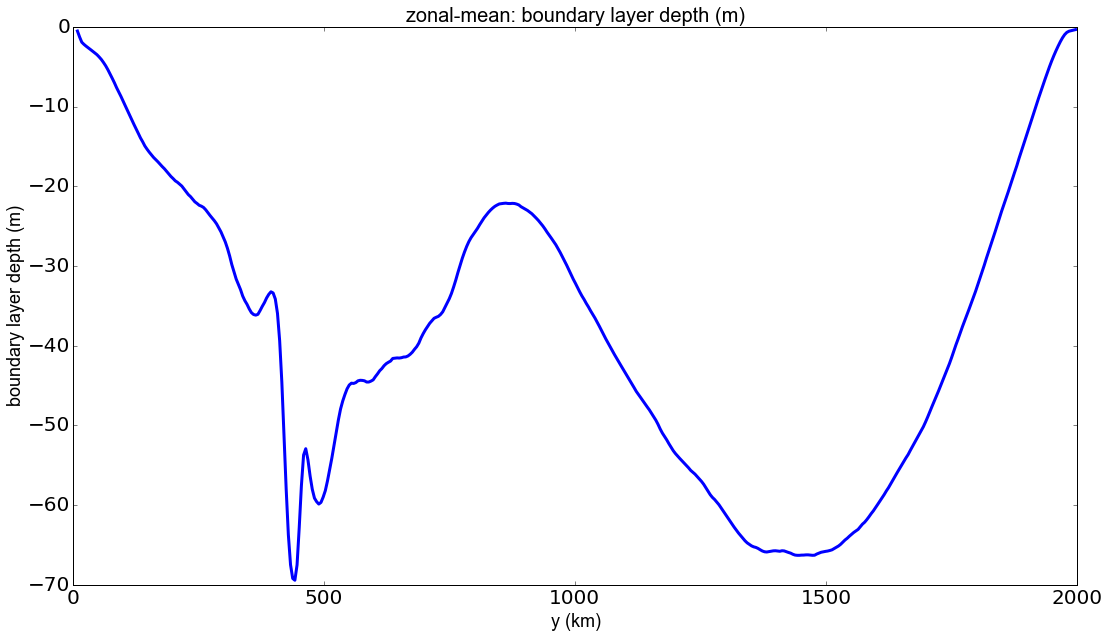

In [51]:
#boundaryLayerDepth
boundaryLayerDepth = outputData.variables['timeSeriesStats_avg_boundaryLayerDepth_1'][iTime,:];
boundaryLayerDepth = boundaryLayerDepth.reshape(nY,nX)

if zonalMean==1:
    sumData = np.sum(boundaryLayerDepth, axis=1);
    sumData = np.divide(sumData,nX)
    plotData = sumData
    figTitle = titlePrefix + 'boundary layer depth (m)'
else:
    plotData = boundaryLayerDepth[:,iSection];
    figTitle = titlePrefix + 'boundary layer depth (m)'

print yPosition.shape
print plotData.shape

plt.plot(yPosition, -plotData, linewidth=3);
plt.title(figTitle, **title_font)
plt.xlabel("y (km)", **axis_font)
plt.ylabel('boundary layer depth (m)', **axis_font)

(460,)
(460,)


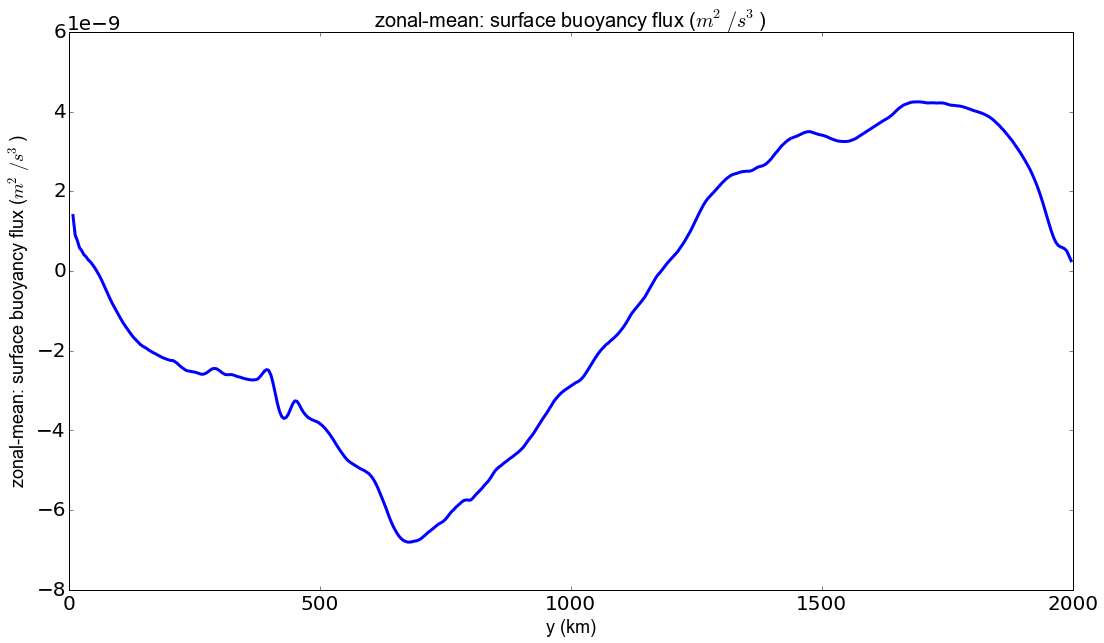

In [52]:
#surfaceBuoyancyForcing
surfaceBuoyancyForcing = outputData.variables['timeSeriesStats_avg_surfaceBuoyancyForcing_1'][iTime,:];
surfaceBuoyancyForcing = surfaceBuoyancyForcing.reshape(nY,nX)

surfaceBuoyancyForcing = surfaceBuoyancyForcing

if zonalMean==1:
    sumData = np.sum(surfaceBuoyancyForcing, axis=1);
    sumData = np.divide(sumData,nX)
    plotData = sumData
    figTitle = titlePrefix + 'surface buoyancy flux ($m^2 / s^3$)'
else:
    plotData = surfaceBuoyancyForcing[:,iSection];
    figTitle = titlePrefix + 'surface buoyancy flux $m^2 / s^3$)'

print yPosition.shape
print plotData.shape

plt.plot(yPosition, plotData, linewidth=3);
plt.title(figTitle, **title_font)
plt.xlabel("y (km)", **axis_font)
plt.ylabel(figTitle, **axis_font)

(460,)
(460,)


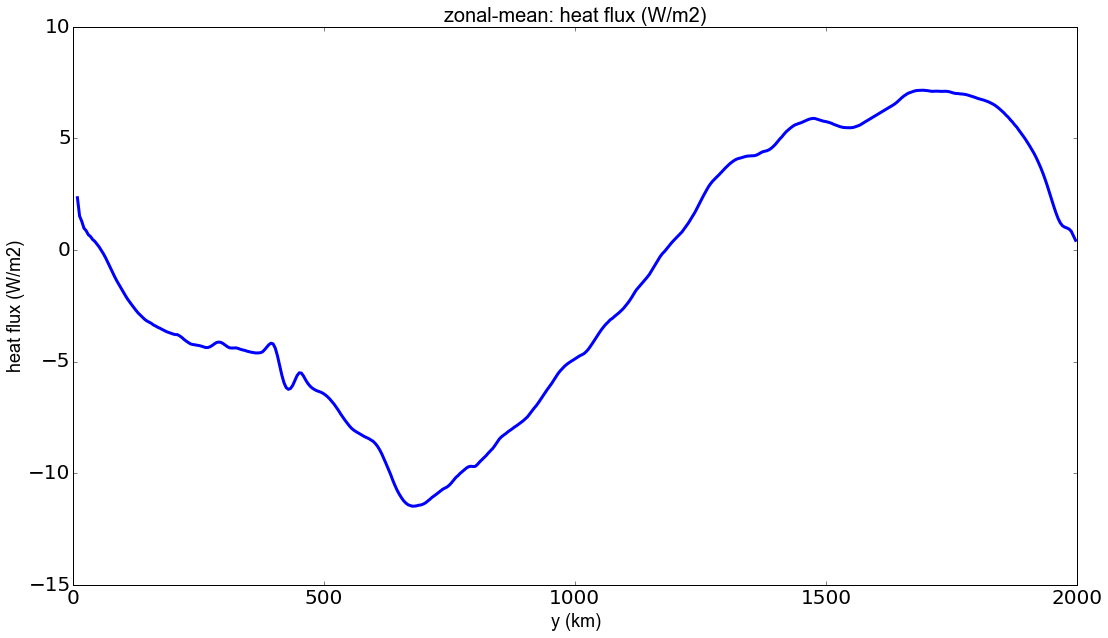

In [53]:
#convert buoyancy flux to an equivalent heat (sensible) flux

#surfaceBuoyancyForcing
surfaceBuoyancyForcing = outputData.variables['timeSeriesStats_avg_surfaceBuoyancyForcing_1'][iTime,:];
surfaceBuoyancyForcing = surfaceBuoyancyForcing.reshape(nY,nX)

surfaceBuoyancyForcing = surfaceBuoyancyForcing



#thermal expansion
config_eos_linear_alpha = 0.255           # kg / m3 / C
config_specific_heat_sea_water = 3985.0   # J/C/kg
config_gravity = 9.81  # m / s2
rho_sw = 1029.0   # kg/ m3

# top row:       (m2) (C m3) (s2)  (kg)  (J)   (kg)
# bottom row:    (s3)  (kg)   (m)  (m3) (C kg)  (m3) 
heatFlux = surfaceBuoyancyForcing / config_eos_linear_alpha / config_gravity * rho_sw * config_specific_heat_sea_water * rho_sw


if zonalMean==1:
    sumData = np.sum(heatFlux, axis=1);
    sumData = np.divide(sumData,nX)
    plotData = sumData
    figTitle = titlePrefix + 'heat flux (W/m2)'
else:
    plotData = heatFlux[:,iSection];
    figTitle = titlePrefix + 'heat flux (W/m2)'

print yPosition.shape
print plotData.shape

plt.plot(yPosition, plotData, linewidth=3);
plt.title(figTitle, **title_font)
plt.xlabel("y (km)", **axis_font)
plt.ylabel('heat flux (W/m2)', **axis_font)

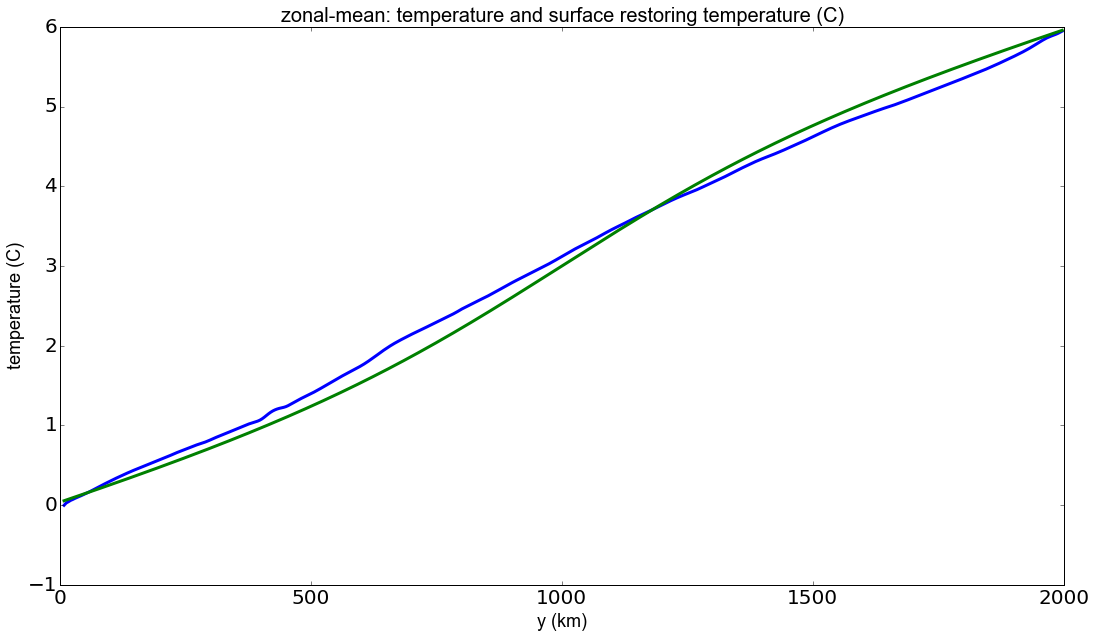

In [54]:
#temperature and temperatureSurfaceRestoringValue
temperature = outputData.variables['timeSeriesStats_avg_activeTracers_1_temperature'][iTime,:,0];
temperature = temperature.reshape(nY,nX)

temperatureSurfaceRestoringValue = forcingData.variables['temperatureSurfaceRestoringValue'][0,:];
temperatureSurfaceRestoringValue = temperatureSurfaceRestoringValue.reshape(nY,nX)

if zonalMean==1:
    sumData = np.sum(temperature, axis=1);
    sumData = np.divide(sumData,nX)
    plotData1 = sumData
    figTitle = titlePrefix + 'temperature and surface restoring temperature (C)'
else:
    plotData1 = temperature[:,iSection];
    figTitle = titlePrefix + 'temperature and surface restoring temperature (C)'
    
if zonalMean==1:
    sumData = np.sum(temperatureSurfaceRestoringValue, axis=1);
    sumData = np.divide(sumData,nX)
    plotData2 = sumData
else:
    plotData = temperature[:,iSection];

plt.plot(yPosition, plotData1, linewidth=3);
plt.plot(yPosition, plotData2, linewidth=3);
plt.title(figTitle, **title_font)
plt.xlabel("y (km)", **axis_font)
plt.ylabel('temperature (C)', **axis_font)

(460,)
(460,)


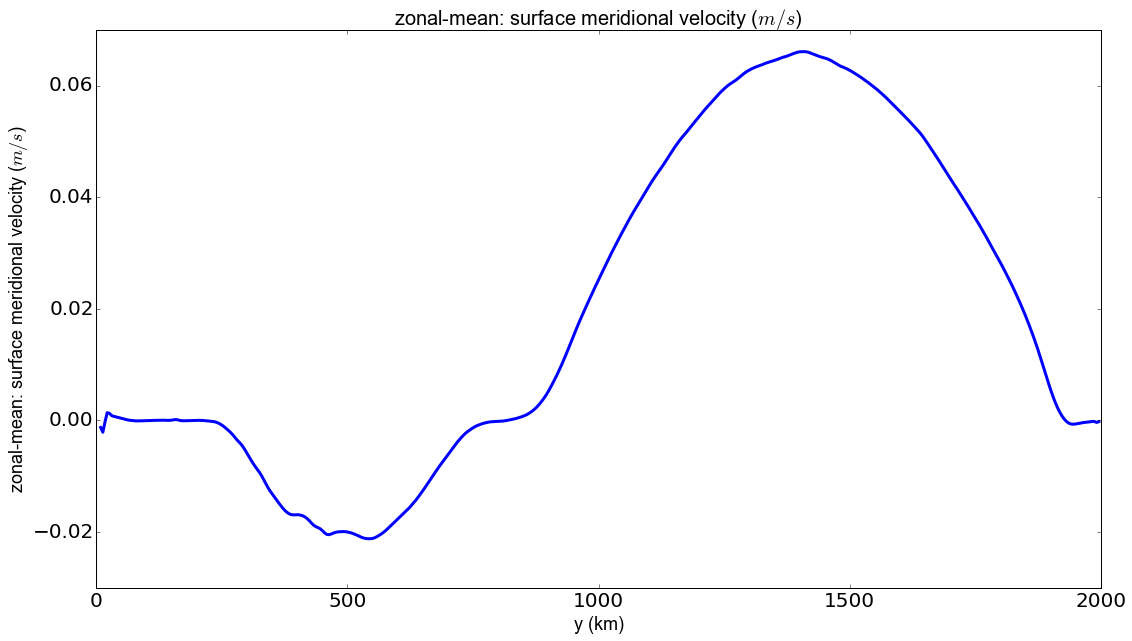

In [55]:
#velocityMeridional
velocityMeridional = outputData.variables['timeSeriesStats_avg_velocityMeridional_1'][iTime,:,10];
velocityMeridional = velocityMeridional.reshape(nY,nX)

if zonalMean==1:
    sumData = np.sum(velocityMeridional, axis=1);
    sumData = np.divide(sumData,nX)
    plotData = sumData
    figTitle = titlePrefix + 'surface meridional velocity ($m / s$)'
else:
    plotData = surfaceBuoyancyForcing[:,iSection];
    figTitle = titlePrefix + 'surface meridional velocity ($m / s$)'

print yPosition.shape
print plotData.shape

plt.plot(yPosition, plotData, linewidth=3);
plt.title(figTitle, **title_font)
plt.xlabel("y (km)", **axis_font)
plt.ylabel(figTitle, **axis_font)

(460,)
(460,)


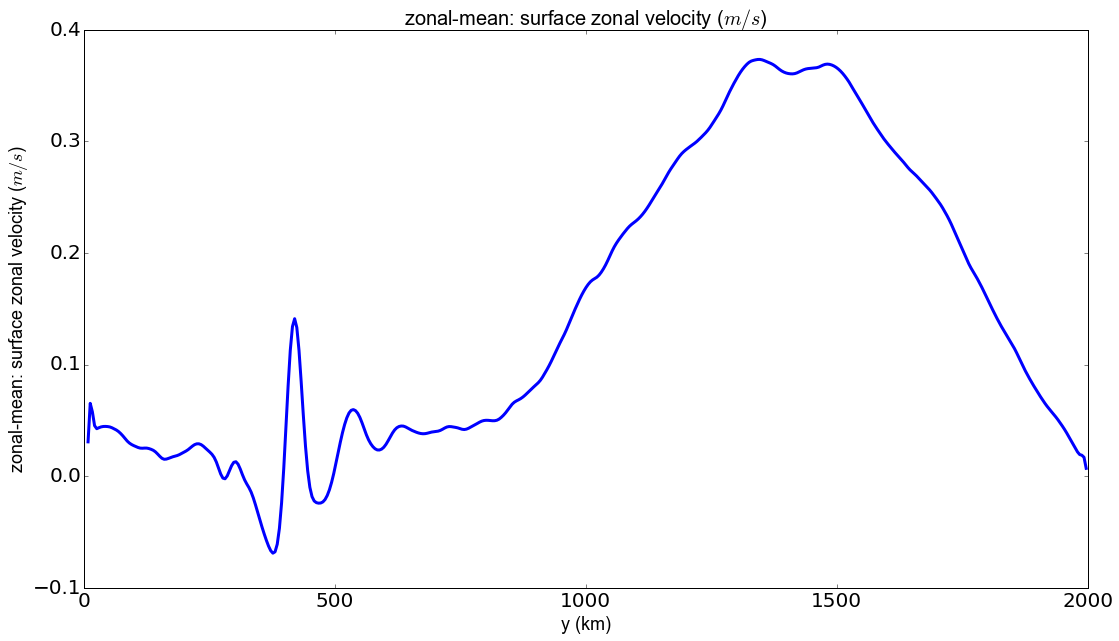

In [56]:
#velocityZonal
velocityZonal = outputData.variables['timeSeriesStats_avg_velocityZonal_1'][iTime,:,10];
velocityZonal = velocityZonal.reshape(nY,nX)

if zonalMean==1:
    sumData = np.sum(velocityZonal, axis=1);
    sumData = np.divide(sumData,nX)
    plotData = sumData
    figTitle = titlePrefix + 'surface zonal velocity ($m / s$)'
else:
    plotData = velocityZonal[:,iSection];
    figTitle = titlePrefix + 'surface zonal velocity ($m / s$)'

print yPosition.shape
print plotData.shape

plt.plot(yPosition, plotData, linewidth=3);
plt.title(figTitle, **title_font)
plt.xlabel("y (km)", **axis_font)
plt.ylabel(figTitle, **axis_font)